In [27]:
using CABLAB

In this Notebook we want to visualize the regions where cube variable take on their highest or lowest value. To do this we calculate the 99% and the 1% quantile for each variable from a subset of the data and afterwards count how often the quantile was exceeded for each variable in each grid cell.

In [28]:
c=Cube("/Net/Groups/BGI/scratch/fgans/cubecopy/datacube/")

CABLAB data cube at /Net/Groups/BGI/scratch/fgans/cubecopy/datacube/
Spatial resolution:  1440x720 at 0.25 degrees.
Temporal resolution: 2000-01-01T00:00:00 to 2011-01-01T00:00:00 at 8daily time steps
Variables:           BHR_VIS BurntArea DHR_VIS Emission GPP Ozone Precip Rg SoilMoisture TER fpar fpar_fluxcom t2m 


In [29]:
cdata=getCubeData(c,variable=c.dataset_files);

In [30]:
sampledata=sampleLandPoints(cdata,100);

Get the quantiles for the subsample

In [31]:
quants=mapCube(timespacequantiles,sampledata,[0.01,0.99])

In-Memory data cube with the following dimensions
Quantile            Axis with elements: 0.01 0.99 
Variable            Axis with elements: BHR_VIS BurntArea DHR_VIS Emission GPP Ozone Precip Rg SoilMoisture TER fpar fpar_fluxcom t2m 


Define a function that counts quantile crossings for each grid cell

In [32]:
"""
How often the upper or lower quantiles are crossed in each time series
"""
function countExtremes(xout::AbstractArray,xin::AbstractVector,qvec::AbstractVector)
    nlow,nhigh=0,0
    qlow,qhigh=qvec
    for v in xin
        if !isnan(v)
            v<=qlow && (nlow+=1)
            v>=qhigh && (nhigh+=1)
        end
    end
    xout[1]=nlow
    xout[2]=nhigh
end

countExtremes

In [34]:
registerDATFunction(countExtremes,((TimeAxis,),(QuantileAxis,)),(QuantileAxis,),inmissing=(:nan,:nan),outmissing=:nan,no_ocean=1)

LoadError: LoadError: UndefVarError: QuantileAxis not defined
while loading In[34], in expression starting on line 1

**Comments: Error: No Axis QuantileAxis defined**

In [14]:
o=mapCube(countExtremes,(cdata,quants),outtype=Int)

LoadError: LoadError: MethodError: no method matching countExtremes(::Array{Int64,0}, ::Array{UInt8,0}, ::Float32, ::UInt8, ::Float32, ::UInt8)
Closest candidates are:
  countExtremes(::AbstractArray{T,N}, !Matched::AbstractArray{T,1}, !Matched::AbstractArray{T,1}) at In[13]:5
while loading In[14], in expression starting on line 1

Now we plot the low extremes

"BHR_VIS"

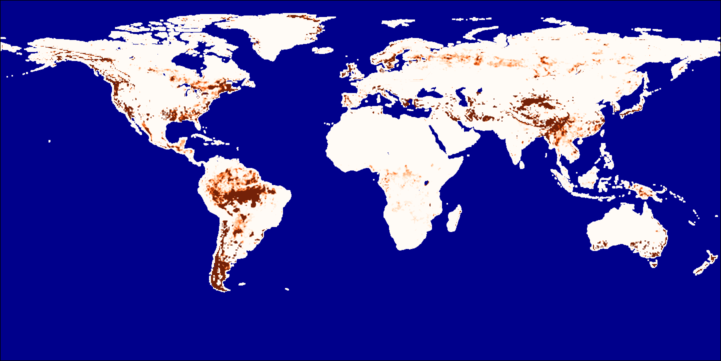

"BurntArea"

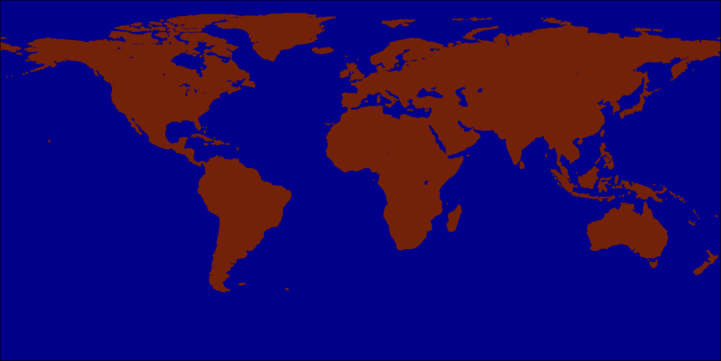

"DHR_VIS"

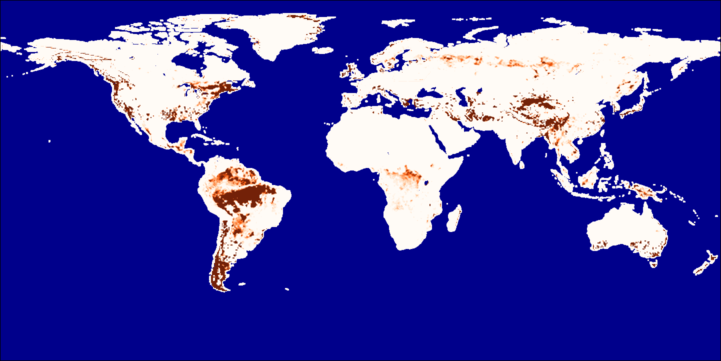

"Emission"

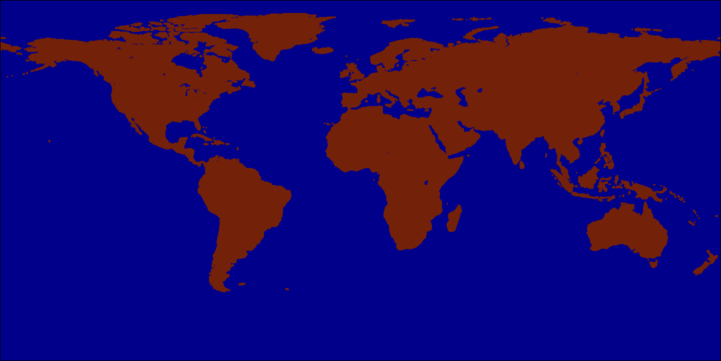

"GPP"

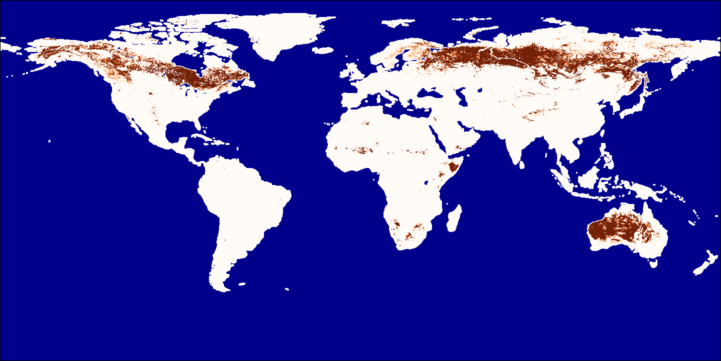

"Ozone"

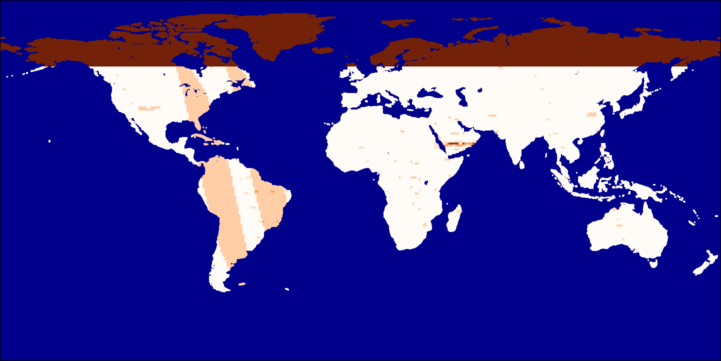

"Precip"

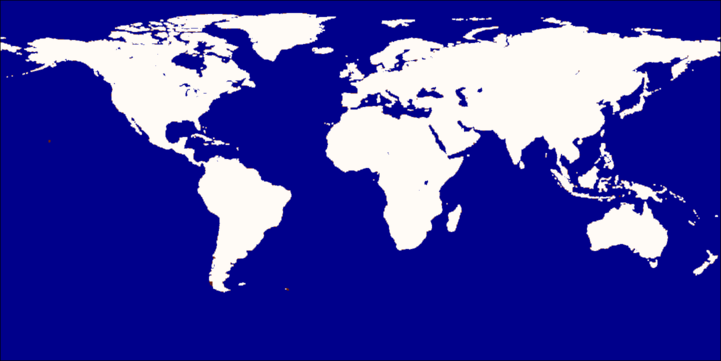

"Rg"

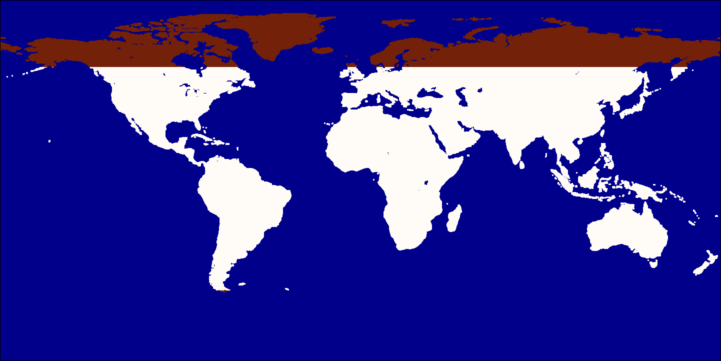

"SoilMoisture"

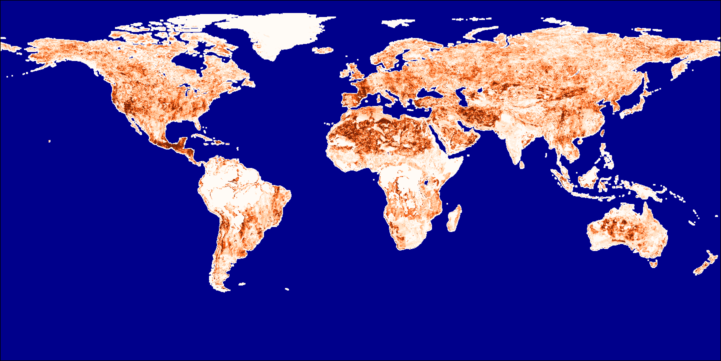

"TER"

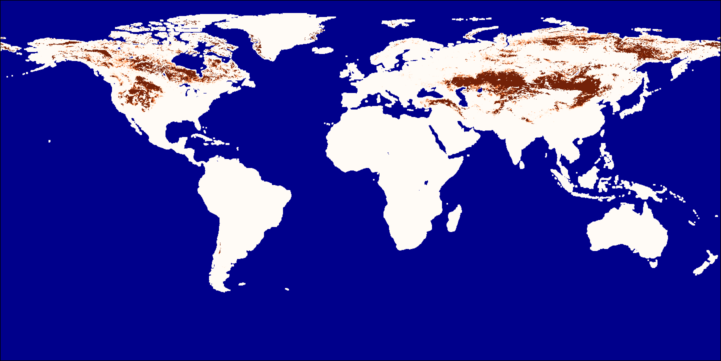

"fpar"

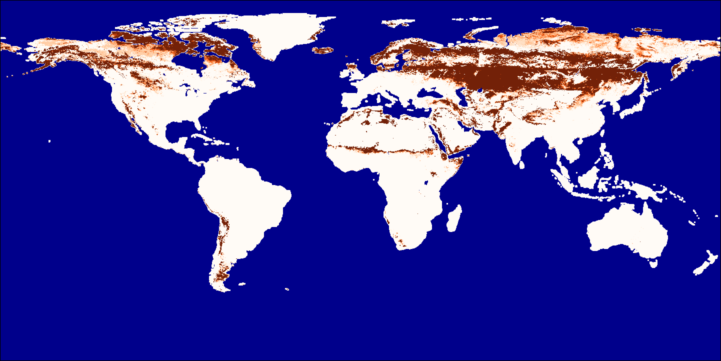

"fpar_fluxcom"

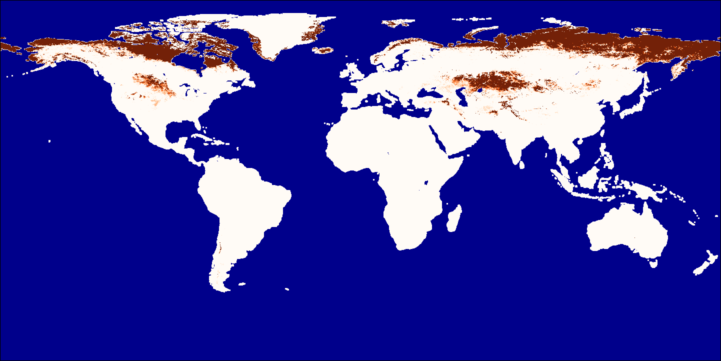

"t2m"

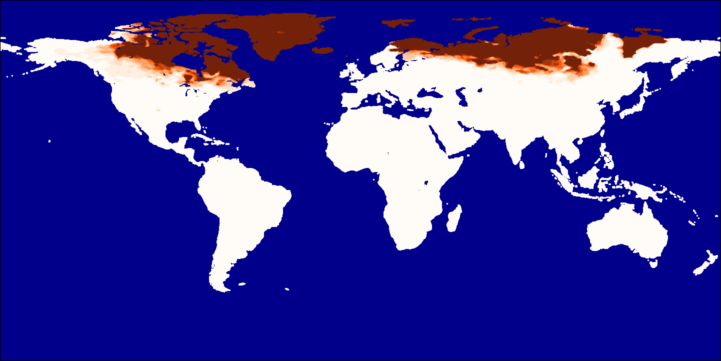

In [16]:
for i=1:13
display(o.axes[4].values[i])
display(plotMAP(o,dmax=10,quant=1,var=i))
end

And the high extremes

"BHR_VIS"

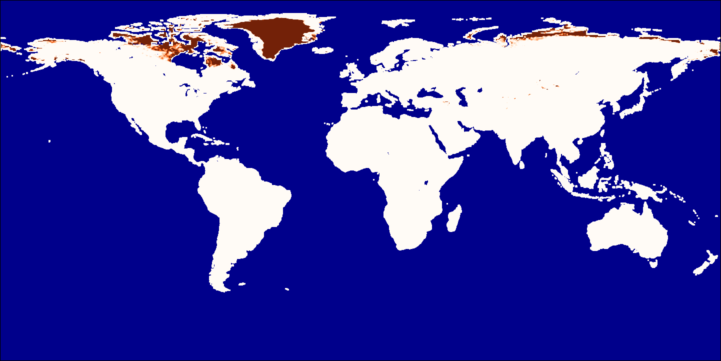

"BurntArea"

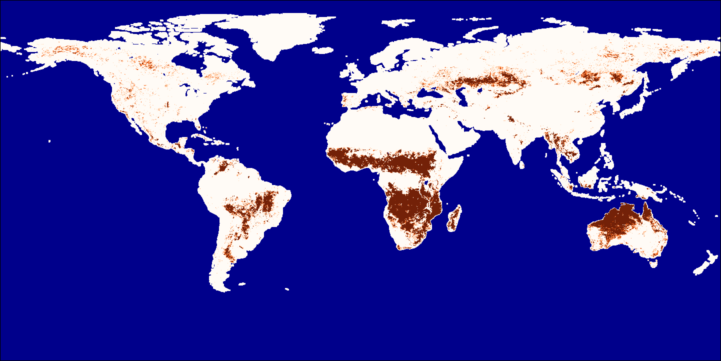

"DHR_VIS"

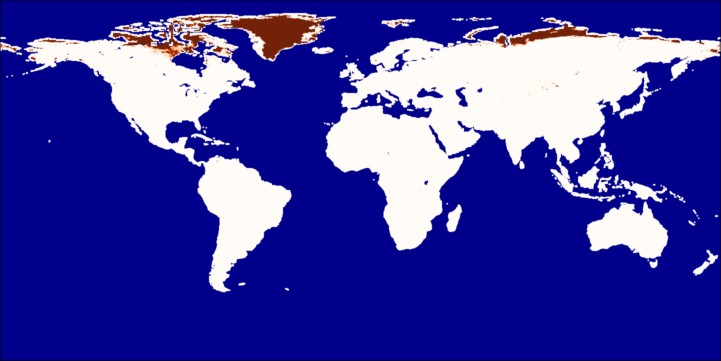

"Emission"

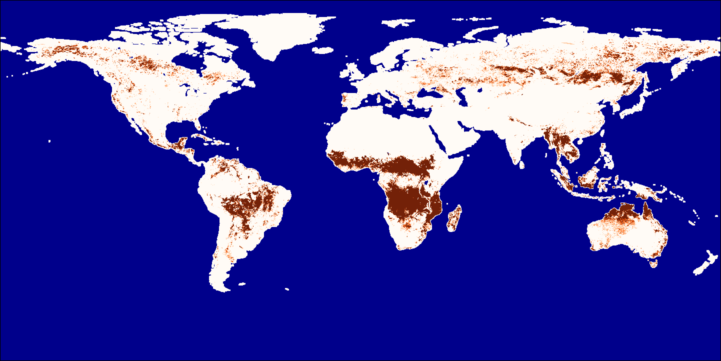

"GPP"

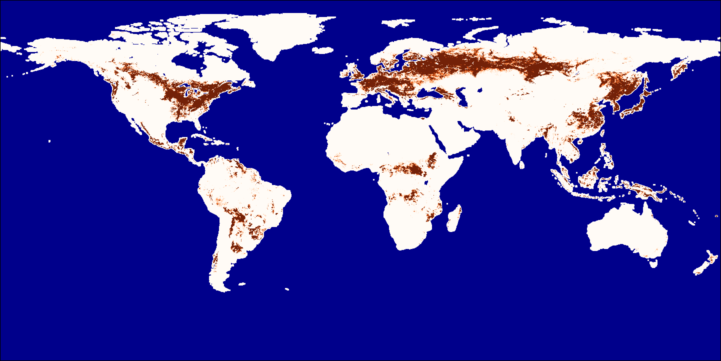

"Ozone"

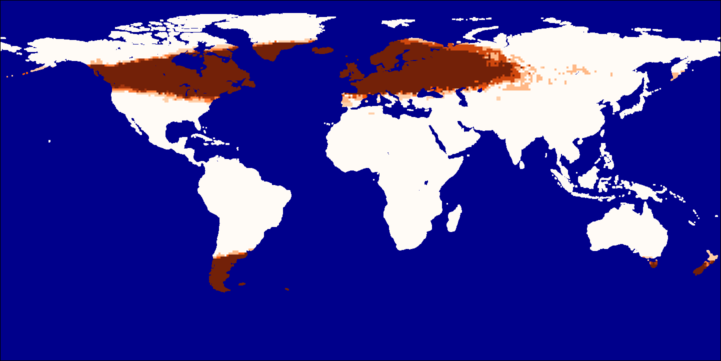

"Precip"

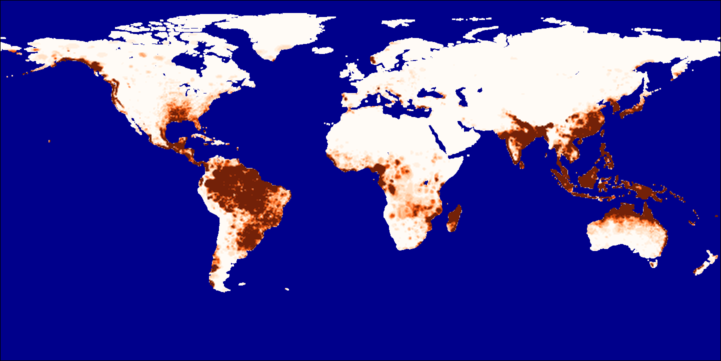

"Rg"

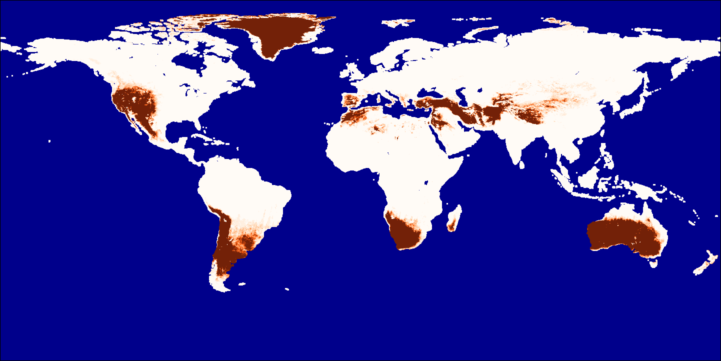

"SoilMoisture"

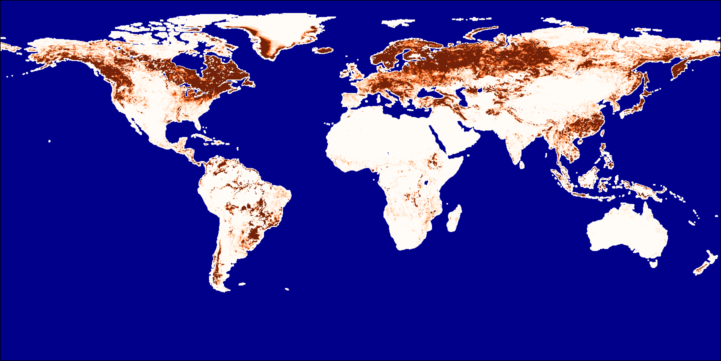

"TER"

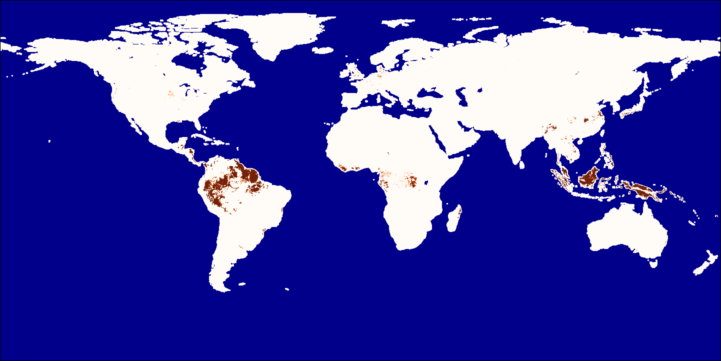

"fpar"

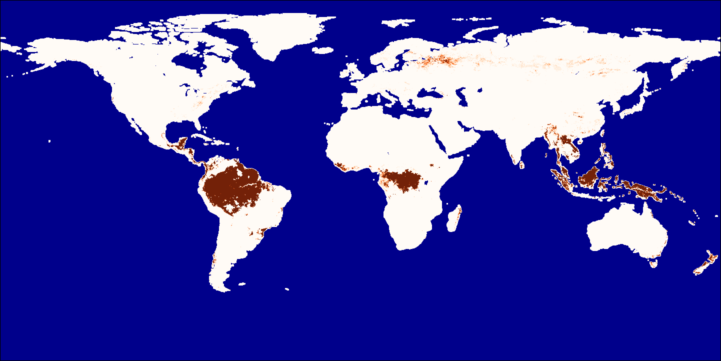

"fpar_fluxcom"

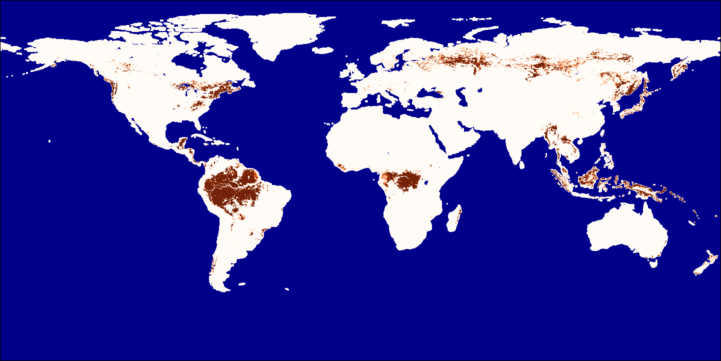

"t2m"

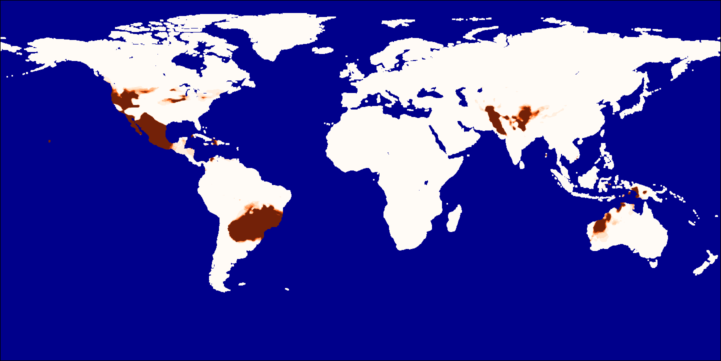

In [17]:
for i=1:13
display(o.axes[4].values[i])
display(plotMAP(o,dmax=10,quant=2,var=i))
end